
# Inspecting RGB Layers of a Local PNG Image

This notebook:
- Loads **one `.png` image** from the local directory (you can set the path)
- Reports the **number of layers (channels)** and the **number of pixels per RGB layer**
- Displays the **original image** and then **each RGB layer** separately
- Notes how non-RGB images (grayscale / RGBA) are handled


## Setup

In [11]:

import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline



## 1) Choose a PNG image

Download an image to use

In [12]:
#get the image if running in colab
!wget -O houses.png https://raw.githubusercontent.com/CNUClasses/471_code/master/week5/houses.png
img_path = "./houses.png"
print("Using image:", img_path)



--2025-09-22 18:22:08--  https://raw.githubusercontent.com/CNUClasses/471_code/master/week5/houses.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192844 (188K) [image/png]
Saving to: ‘houses.png’

houses.png          100%[===================>] 188.32K  --.-KB/s    in 0.03s   

2025-09-22 18:22:09 (6.64 MB/s) - ‘houses.png’ saved [192844/192844]

Using image: ./houses.png


## 2) Load image and summarize channels

In [13]:

# Open with PIL
pil_img = Image.open(img_path)
orig_mode = pil_img.mode  # e.g., "RGB", "RGBA"
orig_ar  = np.array(pil_img)  # shape could be [H,W], [H,W,3], [H,W,4], etc.

# For consistent RGB layer analysis, convert to RGB (drops alpha if present)
rgb_img = pil_img.convert("RGB")
rgb_arr = np.array(rgb_img)     # [H, W, 3]

H, W = rgb_arr.shape[:2]
C_rgb = 3
pixels_per_layer = H * W

print(f"Original PIL mode: {orig_mode}")
print(f"Original array shape: {orig_arr.shape}")
print(f"Converted to RGB array shape: {rgb_arr.shape}  (H={H}, W={W}, C={C_rgb})")
print(f"Pixels per RGB layer: {pixels_per_layer}")
print(f"Total RGB values (H*W*C): {H*W*C_rgb}")


Original PIL mode: RGB
Original array shape: (261, 429, 3)
Converted to RGB array shape: (261, 429, 3)  (H=261, W=429, C=3)
Pixels per RGB layer: 111969
Total RGB values (H*W*C): 335907


In [15]:
rgb_arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[169, 230, 254],
        [169, 230, 254],
        [168, 230, 254],
        ...,
        [  0, 137, 236],
        [  1, 140, 227],
        [ 26, 124, 209]],

       [[172, 230, 254],
        [172, 230, 254],
        [172, 230, 255],
        ...,
        [  0, 137, 229],
        [  0, 140, 219],
        [ 26, 125, 203]],

       ...,

       [[236, 207, 137],
        [236, 207, 135],
        [234, 204, 132],
        ...,
        [172, 166, 132],
        [172, 166, 131],
        [172, 164, 132]],

       [[235, 208, 138],
        [236, 208, 137],
        [236, 209, 138],
        ...,
        [180, 177, 145],
        [172, 168, 136],
        [174, 169, 136]],

       [[236, 209, 139],
        [235, 208, 138],
        [236, 209, 138],
        ...,
        [201, 202, 173],
        [177, 177, 148],
        [167, 166, 137]]


**Explanation**
- PNG images can be **RGB** (3 channels), **RGBA** (RGB + alpha channel), or **grayscale** (`L`), among others.
- We stick to **RGB** to talk consistently about **three** layers (R, G, B).  



## 3) Display the original image

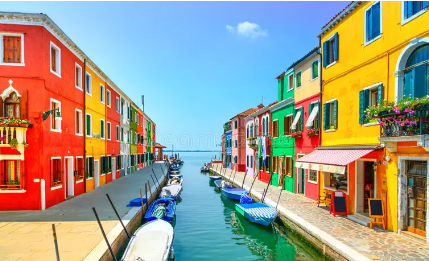

In [14]:

pil_img


In [17]:
import torch

# Use the already-loaded RGB PIL image (rgb_img). If not present, fall back to pil_img.
src_img = rgb_img if 'rgb_img' in globals() else pil_img

# Ensure RGB mode
if getattr(src_img, "mode", None) != "RGB":
    src_img = src_img.convert("RGB")

# Convert to numpy then to PyTorch tensor with shape (C, H, W) 
arr = np.array(src_img)                     # shape: (H, W, 3), dtype=uint8
img_tensor = torch.from_numpy(arr).permute(2, 0, 1).to(torch.float32)

# Optionally, normalize to [0, 1]
img_tensor /= 255.0

print("tensor shape:", img_tensor.shape)
print("dtype:", img_tensor.dtype)
print("min/max:", float(img_tensor.min()), float(img_tensor.max()))
# img_tensor

tensor shape: torch.Size([3, 261, 429])
dtype: torch.float32
min/max: 0.0 1.0



## 4) Display each RGB layer separately

Each layer is a single-channel image. We show it as a grayscale intensity map:
- **Red layer:** higher values (whiter) mean more red at that pixel
- **Green layer:** more green
- **Blue layer:** more blue


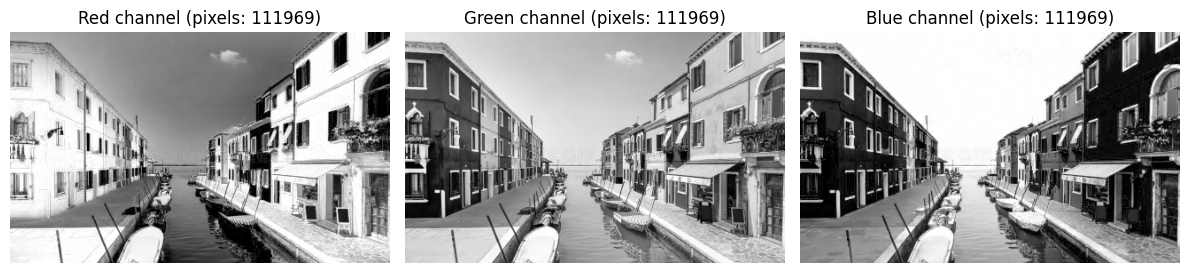

In [18]:

red   = rgb_arr[:, :, 0].astype(np.float32) / 255.0
green = rgb_arr[:, :, 1].astype(np.float32) / 255.0
blue  = rgb_arr[:, :, 2].astype(np.float32) / 255.0

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, ch, name in zip(axes, [red, green, blue], ["Red", "Green", "Blue"]):
    ax.imshow(ch, cmap='gray', vmin=0.0, vmax=1.0)
    ax.set_title(f"{name} channel (pixels: {ch.size})")
    ax.axis('off')
plt.tight_layout()
plt.show()


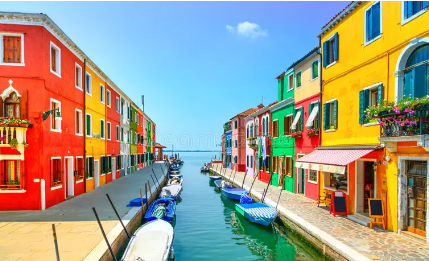

In [19]:
pil_img


### Notes
- **Number of layers (channels): 3** (R, G, B).  
  If your original image was grayscale, it had **1** channel; if RGBA, it had **4**.
- **Pixels per RGB layer:** `height × width`. For a 512×512 image, each RGB layer has **262,144** pixels.
- To analyze **another image**, set `IMAGE_PATH` at the top or drop a `.png` in this directory.
